In [1]:
# Run but do not modify this code
import pandas as pd
import seaborn as sns
from ast import literal_eval

data1 = pd.read_csv("data1.csv")
data2 = pd.read_csv("data2.csv")
data3 = pd.read_csv("data3.csv")
data4 = pd.read_csv("data4.csv")
data1.head()

all_songs = pd.concat([data1, data2, data3, data4])
all_songs.head()


,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


# Summary Stats

In [2]:
avg_danceability = all_songs["danceability"].mean()
avg_acousticness = all_songs["acousticness"].mean()
avg_valence = all_songs["valence"].mean()

print("average danceability:") 
print(avg_danceability)
print("average acousticness: ")
print(avg_acousticness)
print("average valence(positivity): ")
print(avg_valence)


average danceability:
0.49305652179149567
average acousticness: 
0.44675109819685244
average valence(positivity): 
0.42798662251866953


# How features change over time

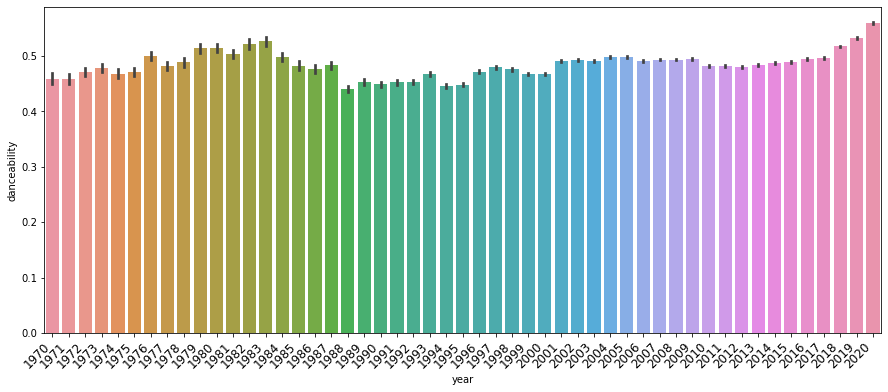

In [3]:
import matplotlib.pyplot as plt

#calculates percent of songs before 1970
before1970 = all_songs[all_songs["year"] < 1970].shape[0]/all_songs.shape[0]

plt.rcParams["figure.figsize"] = (15, 6)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

dance_time = sns.barplot(x = "year", y="danceability", data=all_songs[all_songs["year"] >= 1970])


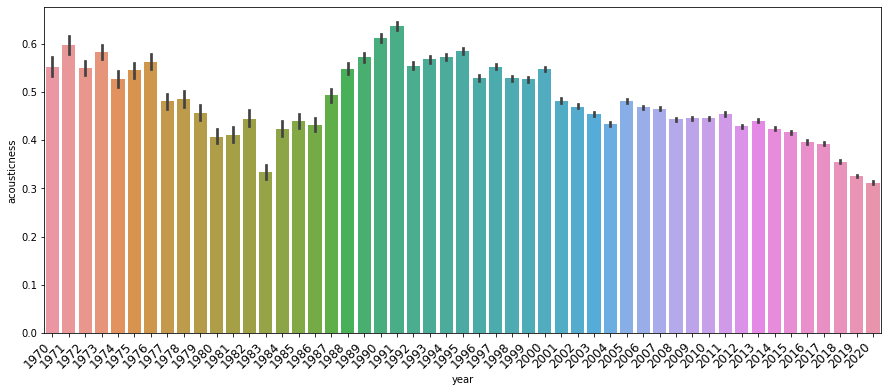

In [4]:
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

acoustic_time = sns.barplot(x = "year", y="acousticness", data=all_songs[all_songs["year"] >= 1970])


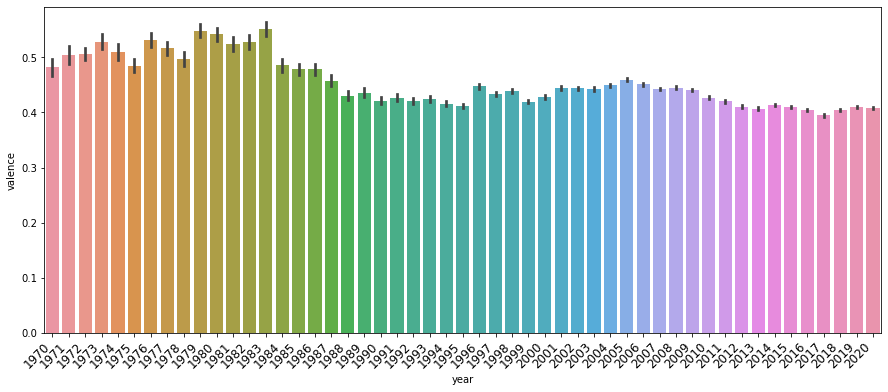

In [5]:
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

valence_time = sns.barplot(x = "year", y="valence", data=all_songs[all_songs["year"] >= 1970])
                                                                             

# Model

In [6]:
artist = []
for a in all_songs["artists"].apply(literal_eval):
    artist.append(a[0])
    
all_songs["artist"] = artist
    

In [7]:
acount = all_songs.groupby("artist").size().sort_values(ascending=False)
print(acount.head(60))

candidates2 = ["Johann Sebastian Bach", "Wolfgang Amadeus Mozart",
             "Sergei Prokofiev", "Aretha Franklin", "Bob Dylan",
            "Fleetwood Mac", "Dolly Parton", "The Fall", "Elvis Presley",
             "Emmylou Harris", "Barry Manilow", "Steven Halpern",
             "Mannheim Steamroller"]
filtered2 = all_songs[all_songs["artist"].isin(candidates2)]

artist
Johann Sebastian Bach                        9473
Ludwig van Beethoven                         5710
Wolfgang Amadeus Mozart                      3768
George Frideric Handel                       3008
Antonio Vivaldi                              2851
Franz Joseph Haydn                           2239
Sergei Prokofiev                             2092
Pyotr Ilyich Tchaikovsky                     2036
Johannes Brahms                              2035
Various Artists                              2027
Frédéric Chopin                              2024
Dmitri Shostakovich                          1952
Franz Schubert                               1804
Robert Schumann                              1693
Vitamin String Quartet                       1578
Traditional                                  1575
Claude Debussy                               1461
The City of Prague Philharmonic Orchestra    1387
Georg Philipp Telemann                       1338
Felix Mendelssohn                          

In [8]:
from sklearn.model_selection import train_test_split

data2 = filtered2[["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness",
                  "instrumentalness", "liveness", "valence", "tempo"]]
target2 = filtered2["artist"]

train_data2, test_data2, train_target2, test_target2 = train_test_split(
    data2, target2, test_size=0.7, random_state=216)


In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_model2 = KNeighborsClassifier(n_neighbors=100)
knn_model2.fit(train_data2, train_target2)
print(knn_model2.score(train_data2, train_target2))
print(knn_model2.score(test_data2, test_target2))

0.453586197062598
0.45196773405035445


accuracy: 0.533854803226595


/Users/caleb1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


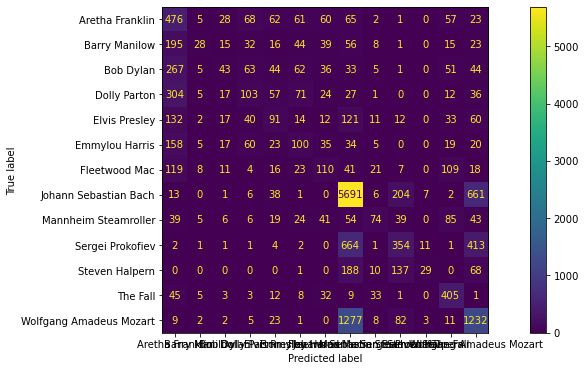

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

logistic_model2 = LogisticRegression(max_iter=1000)
logistic_model2.fit(train_data2, train_target2)
predicted2 = logistic_model2.predict(test_data2)
score2 = accuracy_score(y_true=test_target2, y_pred=predicted2)

print("accuracy: {}".format(score2))

plot_confusion_matrix(logistic_model2, test_data2, test_target2)